### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as sms
import sklearn.preprocessing as sp
import sklearn.linear_model as slm
import sklearn.metrics as sm
import pymysql as ps
import sklearn.ensemble as ens
from warnings import filterwarnings
filterwarnings('ignore')
import sklearn.linear_model as slm
import sklearn.svm as svm

### Loading data

In [2]:
# dataset is in the database
conn=ps.Connect(host='localhost', user='root', db='***', passwd='*****')

In [3]:
# retrieving data
df1=pd.read_sql('select * from ***', con=conn)
df1.head()

,id,date,avtosalon,salon_yn,marka,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,...,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya
0,1,2018-03-08 22:12:54,none,0,Mercedes,C 200,9,yox,107,Yeniləndi,...,0,1,0,1,0,0,1,0,0,0
1,2,2018-03-08 22:12:54,none,0,Mitsubishi,Pajero,5,yox,78,Yeniləndi,...,0,1,1,1,0,0,0,1,0,0
2,3,2018-03-08 22:12:54,none,0,Mercedes,C 220,7,yox,118,Yeniləndi,...,1,1,0,1,0,0,0,0,0,0
3,4,2018-03-08 22:12:54,none,0,Volkswagen,Touareg,10,yox,1639,Yeniləndi,...,1,1,1,1,1,1,1,1,1,1
4,5,2018-03-08 22:12:54,none,0,Hyundai,Sonata,8,yox,227,Yeniləndi,...,1,1,1,1,1,1,0,0,1,0


### Preprocessing

In [4]:
pd.set_option('max_columns', None)
df1.drop(columns=['tel1', 'tel2', 'tel3', 'tel4', 'tel5', 'tel6'], inplace=True)
df1.head(2)

,id,date,avtosalon,salon_yn,marka,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,elan_tarix,elan_id,satici,tel_say,sheher,il,ban_novu,reng,muherrik_hecm,muherrik_guc,yanacaq,yurush,karobka,oturucu,yeni,qiymet_valyuta,qiymet,kredit,barter,info,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya
0,1,2018-03-08 22:12:54,none,0,Mercedes,C 200,9,yox,107,Yeniləndi,08 Mart 2018,2259740,Ferid,1,Bakı,1997,Sedan,Gümüşü,2.0,136 a.g.,Benzin,200 000 km,Avtomat,Arxa,Xeyr,AZN,9750,0,0,Hec bir prablemi yoxdu mawin zabratdadi isdiye...,0,1,0,0,1,0,1,0,0,1,0,0,0
1,2,2018-03-08 22:12:54,none,0,Mitsubishi,Pajero,5,yox,78,Yeniləndi,08 Mart 2018,2259742,Famil,1,Bakı,2003,Offroader / SUV,Qızılı,3.0,180 a.g.,Benzin,174 392 km,Avtomat,Tam,Xeyr,AZN,13800,0,1,Tecili Satilir Senedleri qaydasinda Hec Bir Pr...,1,1,0,0,1,1,1,0,0,0,1,0,0


In [5]:
df1.groupby(by='marka').count().sort_values(by='id', ascending=False).head(10)

,id,date,avtosalon,salon_yn,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,elan_tarix,elan_id,satici,tel_say,sheher,il,ban_novu,reng,muherrik_hecm,muherrik_guc,yanacaq,yurush,karobka,oturucu,yeni,qiymet_valyuta,qiymet,kredit,barter,info,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya
marka,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mercedes,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313
LADA (VAZ),5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5791,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793,5793
Hyundai,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609
Opel,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1564,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
BMW,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292
Toyota,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088
Kia,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866
Volkswagen,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755
Nissan,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703


I will go on the Mercedes vehicles data to make **accurate predictor model**

In [6]:
df_m=df1[df1.marka=='Mercedes']
df_m.head(3)

,id,date,avtosalon,salon_yn,marka,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,elan_tarix,elan_id,satici,tel_say,sheher,il,ban_novu,reng,muherrik_hecm,muherrik_guc,yanacaq,yurush,karobka,oturucu,yeni,qiymet_valyuta,qiymet,kredit,barter,info,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya
0,1,2018-03-08 22:12:54,none,0,Mercedes,C 200,9,yox,107,Yeniləndi,08 Mart 2018,2259740,Ferid,1,Bakı,1997,Sedan,Gümüşü,2.0,136 a.g.,Benzin,200 000 km,Avtomat,Arxa,Xeyr,AZN,9750,0,0,Hec bir prablemi yoxdu mawin zabratdadi isdiye...,0,1,0,0,1,0,1,0,0,1,0,0,0
2,3,2018-03-08 22:12:54,none,0,Mercedes,C 220,7,yox,118,Yeniləndi,08 Mart 2018,2259743,Elsad,1,Şəki,1995,Sedan,Yaş Asfalt,2.2,150 a.g.,Benzin,262 000 km,Avtomat,Tam,Xeyr,AZN,9900,0,0,Masin ideal vezyetdedir. tekerleri yenidir. k...,1,1,1,1,1,0,1,0,0,0,0,0,0
8,9,2018-03-08 22:12:55,none,0,Mercedes,S 350,21,yox,8636,Yeniləndi,08 Mart 2018,2158766,Fəhmi,1,Bakı,2007,Sedan,Ağ,3.5,272 a.g.,Benzin,122 330 km,Avtomat,Tam,Xeyr,$,23000,0,0,COX TECİLİ SATİLİR ! ! !\n,1,1,1,1,1,1,1,1,1,1,1,1,1


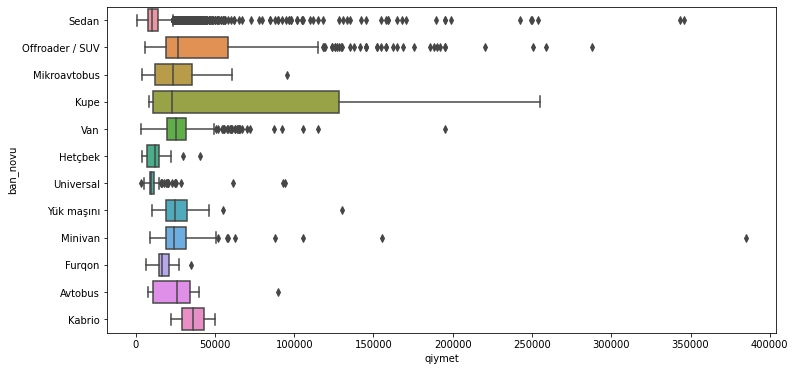

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_m.qiymet, y=df_m.ban_novu, data=df_m)
plt.show()

In [8]:
df_m['mc']=df_m.muherrik_guc.str.replace(' a.g.', '').astype(float)
df_m.head(2)

,id,date,avtosalon,salon_yn,marka,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,elan_tarix,elan_id,satici,tel_say,sheher,il,ban_novu,reng,muherrik_hecm,muherrik_guc,yanacaq,yurush,karobka,oturucu,yeni,qiymet_valyuta,qiymet,kredit,barter,info,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mc
0,1,2018-03-08 22:12:54,none,0,Mercedes,C 200,9,yox,107,Yeniləndi,08 Mart 2018,2259740,Ferid,1,Bakı,1997,Sedan,Gümüşü,2.0,136 a.g.,Benzin,200 000 km,Avtomat,Arxa,Xeyr,AZN,9750,0,0,Hec bir prablemi yoxdu mawin zabratdadi isdiye...,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0
2,3,2018-03-08 22:12:54,none,0,Mercedes,C 220,7,yox,118,Yeniləndi,08 Mart 2018,2259743,Elsad,1,Şəki,1995,Sedan,Yaş Asfalt,2.2,150 a.g.,Benzin,262 000 km,Avtomat,Tam,Xeyr,AZN,9900,0,0,Masin ideal vezyetdedir. tekerleri yenidir. k...,1,1,1,1,1,0,1,0,0,0,0,0,0,150.0


In [9]:
f=df_m['yr']=df_m.yurush.str.replace(' km', '')
df_m['yr']=df_m['yr'].str.replace(' ', '').astype(float)
df_m.head(2)

,id,date,avtosalon,salon_yn,marka,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,elan_tarix,elan_id,satici,tel_say,sheher,il,ban_novu,reng,muherrik_hecm,muherrik_guc,yanacaq,yurush,karobka,oturucu,yeni,qiymet_valyuta,qiymet,kredit,barter,info,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mc,yr
0,1,2018-03-08 22:12:54,none,0,Mercedes,C 200,9,yox,107,Yeniləndi,08 Mart 2018,2259740,Ferid,1,Bakı,1997,Sedan,Gümüşü,2.0,136 a.g.,Benzin,200 000 km,Avtomat,Arxa,Xeyr,AZN,9750,0,0,Hec bir prablemi yoxdu mawin zabratdadi isdiye...,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0,200000.0
2,3,2018-03-08 22:12:54,none,0,Mercedes,C 220,7,yox,118,Yeniləndi,08 Mart 2018,2259743,Elsad,1,Şəki,1995,Sedan,Yaş Asfalt,2.2,150 a.g.,Benzin,262 000 km,Avtomat,Tam,Xeyr,AZN,9900,0,0,Masin ideal vezyetdedir. tekerleri yenidir. k...,1,1,1,1,1,0,1,0,0,0,0,0,0,150.0,262000.0


In [10]:
df_m['qiymet_valyuta'][df_m.qiymet_valyuta=='€'].value_counts()

€    12
Name: qiymet_valyuta, dtype: int64

**Currency rates were defined according to the time posts were published**

In [11]:
df_m['qmt']=None
df_m['qmt'][df_m.qiymet_valyuta=='€']=df_m.qiymet[df_m.qiymet_valyuta=='€']*2.1106 
# I added to 'qmt' Euro with converting to manat

In [12]:
df_m['qmt'][df_m.qiymet_valyuta=='$']=df_m.qiymet[df_m.qiymet_valyuta=='$']*1.70 
# I added to 'qmt' Dollar with converting to manat

In [13]:
df_m['qmt'][df_m.qiymet_valyuta=='AZN']=df_m.qiymet[df_m.qiymet_valyuta=='AZN']*1  
#I added to 'qmt' itself of AZN

In [14]:
df_m[['qiymet_valyuta', 'qiymet','qmt']].head()

,qiymet_valyuta,qiymet,qmt
0,AZN,9750,9750
2,AZN,9900,9900
8,$,23000,39100
9,$,22700,38590
11,AZN,13289,13289


In [15]:
df_m.rename(columns={'mc':'mg'}, inplace=True)
df_m['yash']=2019-df_m['il'] 
# The year that published is 2019

##### Adding Polynomial features

In [16]:
poly=sp.PolynomialFeatures()

In [17]:
df_m.columns

Index(['id', 'date', 'avtosalon', 'salon_yn', 'marka', 'model', 'shekil_sayi',
       'satilib', 'baxis_sayi', 'elan_tarix_title', 'elan_tarix', 'elan_id',
       'satici', 'tel_say', 'sheher', 'il', 'ban_novu', 'reng',
       'muherrik_hecm', 'muherrik_guc', 'yanacaq', 'yurush', 'karobka',
       'oturucu', 'yeni', 'qiymet_valyuta', 'qiymet', 'kredit', 'barter',
       'info', 'disk', 'abs', 'lyuk', 'yagish', 'qapanma', 'radar',
       'kondisioner', 'podoqrev', 'deri', 'ksenon', 'kamera', 'perde',
       'ventilyasiya', 'mg', 'yr', 'qmt', 'yash'],
      dtype='object')

In [18]:
poly2=pd.DataFrame(poly.fit_transform(df_m[['shekil_sayi','tel_say','muherrik_hecm','mg','yr','yash']]))

In [19]:
poly.get_feature_names(input_features=['shekil_sayi','tel_say','muherrik_hecm','mg','yr','yash'])

['1',
 'shekil_sayi',
 'tel_say',
 'muherrik_hecm',
 'mg',
 'yr',
 'yash',
 'shekil_sayi^2',
 'shekil_sayi tel_say',
 'shekil_sayi muherrik_hecm',
 'shekil_sayi mg',
 'shekil_sayi yr',
 'shekil_sayi yash',
 'tel_say^2',
 'tel_say muherrik_hecm',
 'tel_say mg',
 'tel_say yr',
 'tel_say yash',
 'muherrik_hecm^2',
 'muherrik_hecm mg',
 'muherrik_hecm yr',
 'muherrik_hecm yash',
 'mg^2',
 'mg yr',
 'mg yash',
 'yr^2',
 'yr yash',
 'yash^2']

In [20]:
poly2.columns=['1',
 'shekil_sayi',
 'tel_say',
 'muherrik_hecm',
 'mg',
 'yr',
 'yash',
 'shekil_sayi^2',
 'shekil_sayi__tel_say',
 'shekil_sayi__muherrik_hecm',
 'shekil_sayi__mg',
 'shekil_sayi__yr',
 'shekil_sayi__yash',
 'tel_say^2',
 'tel_say__muherrik_hecm',
 'tel_say__mg',
 'tel_say__yr',
 'tel_say__yash',
 'muherrik_hecm^2',
 'muherrik_hecm__mg',
 'muherrik_hecm__yr',
 'muherrik_hecm__yash',
 'mg^2',
 'mg__yr',
 'mg__yash',
 'yr^2',
 'yr__yash',
 'yash^2']

In [21]:
poly2.head(2)

,1,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2
0,1.0,9.0,1.0,2.0,136.0,200000.0,22.0,81.0,9.0,18.0,1224.0,1800000.0,198.0,1.0,2.0,136.0,200000.0,22.0,4.00,272.0,400000.0,44.0,18496.0,27200000.0,2992.0,4.000000e+10,4400000.0,484.0
1,1.0,7.0,1.0,2.2,150.0,262000.0,24.0,49.0,7.0,15.4,1050.0,1834000.0,168.0,1.0,2.2,150.0,262000.0,24.0,4.84,330.0,576400.0,52.8,22500.0,39300000.0,3600.0,6.864400e+10,6288000.0,576.0


In [22]:
poly2.drop(columns=['1',
 'shekil_sayi',
 'tel_say',
 'muherrik_hecm',
 'mg',
 'yr',
 'yash'],inplace=True)
poly2.head(2)

,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2
0,81.0,9.0,18.0,1224.0,1800000.0,198.0,1.0,2.0,136.0,200000.0,22.0,4.00,272.0,400000.0,44.0,18496.0,27200000.0,2992.0,4.000000e+10,4400000.0,484.0
1,49.0,7.0,15.4,1050.0,1834000.0,168.0,1.0,2.2,150.0,262000.0,24.0,4.84,330.0,576400.0,52.8,22500.0,39300000.0,3600.0,6.864400e+10,6288000.0,576.0


In [23]:
df_m.columns

Index(['id', 'date', 'avtosalon', 'salon_yn', 'marka', 'model', 'shekil_sayi',
       'satilib', 'baxis_sayi', 'elan_tarix_title', 'elan_tarix', 'elan_id',
       'satici', 'tel_say', 'sheher', 'il', 'ban_novu', 'reng',
       'muherrik_hecm', 'muherrik_guc', 'yanacaq', 'yurush', 'karobka',
       'oturucu', 'yeni', 'qiymet_valyuta', 'qiymet', 'kredit', 'barter',
       'info', 'disk', 'abs', 'lyuk', 'yagish', 'qapanma', 'radar',
       'kondisioner', 'podoqrev', 'deri', 'ksenon', 'kamera', 'perde',
       'ventilyasiya', 'mg', 'yr', 'qmt', 'yash'],
      dtype='object')

In [24]:
df_m_last=pd.get_dummies(data=df_m,prefix=['bn','rg','ync','kr','ots','new','cur'], 
                         columns=['ban_novu','reng','yanacaq','karobka','oturucu','yeni','qiymet_valyuta'])

bn_Sedan, rg_Qara, ync_benzin, kr_Avtomat, ots_Arxa, new_Xeyr, cur_AZN should be dropped, becuse they are mostly exist in their **dummy catagory**

In [25]:
df_m_last.drop(columns=['bn_Sedan','rg_Qara','ync_Benzin','kr_Avtomat','ots_Arxa','new_Xeyr','cur_AZN','il'],inplace=True)

In [26]:
df_m_last.head(1)

,id,date,avtosalon,salon_yn,marka,model,shekil_sayi,satilib,baxis_sayi,elan_tarix_title,elan_tarix,elan_id,satici,tel_say,sheher,muherrik_hecm,muherrik_guc,yurush,qiymet,kredit,barter,info,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mg,yr,qmt,yash,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€
0,1,2018-03-08 22:12:54,none,0,Mercedes,C 200,9,yox,107,Yeniləndi,08 Mart 2018,2259740,Ferid,1,Bakı,2.0,136 a.g.,200 000 km,9750,0,0,Hec bir prablemi yoxdu mawin zabratdadi isdiye...,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0,200000.0,9750,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df_m_last.columns

Index(['id', 'date', 'avtosalon', 'salon_yn', 'marka', 'model', 'shekil_sayi',
       'satilib', 'baxis_sayi', 'elan_tarix_title', 'elan_tarix', 'elan_id',
       'satici', 'tel_say', 'sheher', 'muherrik_hecm', 'muherrik_guc',
       'yurush', 'qiymet', 'kredit', 'barter', 'info', 'disk', 'abs', 'lyuk',
       'yagish', 'qapanma', 'radar', 'kondisioner', 'podoqrev', 'deri',
       'ksenon', 'kamera', 'perde', 'ventilyasiya', 'mg', 'yr', 'qmt', 'yash',
       'bn_Avtobus', 'bn_Furqon', 'bn_Hetçbek', 'bn_Kabrio', 'bn_Kupe',
       'bn_Mikroavtobus', 'bn_Minivan', 'bn_Offroader / SUV', 'bn_Universal',
       'bn_Van', 'bn_Yük maşını', 'rg_Ağ', 'rg_Bej', 'rg_Boz', 'rg_Bənövşəyi',
       'rg_Göy', 'rg_Gümüşü', 'rg_Mavi', 'rg_Narıncı', 'rg_Qırmızı',
       'rg_Qızılı', 'rg_Qəhvəyi', 'rg_Sarı', 'rg_Tünd qırmızı',
       'rg_Yaş Asfalt', 'rg_Yaşıl', 'rg_Çəhrayı', 'ync_Dizel', 'ync_Qaz',
       'kr_Mexaniki', 'ots_Tam', 'ots_Ön', 'new_Bəli', 'cur_$', 'cur_€'],
      dtype='object')

In [28]:
dt=df_m_last[['salon_yn','shekil_sayi','tel_say','muherrik_hecm','kredit',
       'barter','disk', 'abs', 'lyuk', 'yagish', 'qapanma', 'radar',
       'kondisioner', 'podoqrev', 'deri','ksenon', 'kamera', 'perde',
       'ventilyasiya','mg', 'yr', 'qmt', 'yash', 'bn_Avtobus', 'bn_Furqon',
       'bn_Hetçbek', 'bn_Kabrio', 'bn_Kupe', 'bn_Mikroavtobus', 'bn_Minivan',
       'bn_Offroader / SUV', 'bn_Universal', 'bn_Van', 'bn_Yük maşını',
       'rg_Ağ', 'rg_Bej', 'rg_Boz', 'rg_Bənövşəyi', 'rg_Göy', 'rg_Gümüşü',
       'rg_Mavi', 'rg_Narıncı', 'rg_Qırmızı', 'rg_Qızılı', 'rg_Qəhvəyi',
       'rg_Sarı', 'rg_Tünd qırmızı', 'rg_Yaş Asfalt', 'rg_Yaşıl', 'rg_Çəhrayı',
       'ync_Dizel', 'ync_Qaz', 'kr_Mexaniki', 'ots_Tam', 'ots_Ön', 'new_Bəli',
       'cur_$', 'cur_€']]

In [29]:
dt.head(2)

,salon_yn,shekil_sayi,tel_say,muherrik_hecm,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mg,yr,qmt,yash,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€
0,0,9,1,2.0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0,200000.0,9750,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7,1,2.2,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,150.0,262000.0,9900,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [30]:
cubic=dt[['shekil_sayi','tel_say','muherrik_hecm','mg','yr','yash']]**3
cubic.head()

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash
0,729,1,8.000,2515456.0,8.000000e+15,10648
2,343,1,10.648,3375000.0,1.798473e+16,13824
8,9261,1,42.875,20123648.0,1.830623e+15,1728
9,1000,1,10.648,4913000.0,1.011147e+16,512
11,343,1,12.167,3375000.0,1.839974e+16,10648


In [31]:
dt.reset_index(drop=True,inplace=True)

In [32]:
cubic.reset_index(drop=True,inplace=True)
cubic.head(2)

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash
0,729,1,8.000,2515456.0,8.000000e+15,10648
1,343,1,10.648,3375000.0,1.798473e+16,13824


In [33]:
dt=dt.merge(poly2,left_index=True,right_index=True)
dt.head(2)

,salon_yn,shekil_sayi,tel_say,muherrik_hecm,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mg,yr,qmt,yash,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2
0,0,9,1,2.0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0,200000.0,9750,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.0,9.0,18.0,1224.0,1800000.0,198.0,1.0,2.0,136.0,200000.0,22.0,4.00,272.0,400000.0,44.0,18496.0,27200000.0,2992.0,4.000000e+10,4400000.0,484.0
1,0,7,1,2.2,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,150.0,262000.0,9900,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,49.0,7.0,15.4,1050.0,1834000.0,168.0,1.0,2.2,150.0,262000.0,24.0,4.84,330.0,576400.0,52.8,22500.0,39300000.0,3600.0,6.864400e+10,6288000.0,576.0


In [34]:
cubic.columns

Index(['shekil_sayi', 'tel_say', 'muherrik_hecm', 'mg', 'yr', 'yash'], dtype='object')

In [35]:
cubic.columns=['shekil_sayi^3', 'tel_say^3', 'muherrik_hecm^3', 'mg^3', 'yr^3', 'yash^3']
cubic.head(2)

,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,729,1,8.000,2515456.0,8.000000e+15,10648
1,343,1,10.648,3375000.0,1.798473e+16,13824


In [36]:
dt=dt.merge(cubic,left_index=True,right_index=True)
dt.head(2)

,salon_yn,shekil_sayi,tel_say,muherrik_hecm,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mg,yr,qmt,yash,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,0,9,1,2.0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0,200000.0,9750,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.0,9.0,18.0,1224.0,1800000.0,198.0,1.0,2.0,136.0,200000.0,22.0,4.00,272.0,400000.0,44.0,18496.0,27200000.0,2992.0,4.000000e+10,4400000.0,484.0,729,1,8.000,2515456.0,8.000000e+15,10648
1,0,7,1,2.2,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,150.0,262000.0,9900,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,49.0,7.0,15.4,1050.0,1834000.0,168.0,1.0,2.2,150.0,262000.0,24.0,4.84,330.0,576400.0,52.8,22500.0,39300000.0,3600.0,6.864400e+10,6288000.0,576.0,343,1,10.648,3375000.0,1.798473e+16,13824


In [37]:
len(list(dt.columns)), len(set(dt.columns))
# number of all columns , number of unique columns

(85, 85)

#### Splitting data

In [38]:
train, test=sms.train_test_split(dt, test_size=0.2, random_state=25)

In [39]:
train.shape, test.shape

((5050, 85), (1263, 85))

In [40]:
dt.head(3)

,salon_yn,shekil_sayi,tel_say,muherrik_hecm,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,mg,yr,qmt,yash,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,0,9,1,2.0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,136.0,200000.0,9750,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.0,9.0,18.0,1224.0,1800000.0,198.0,1.0,2.0,136.0,200000.0,22.0,4.00,272.0,400000.0,44.0,18496.0,27200000.0,2992.0,4.000000e+10,4400000.0,484.0,729,1,8.000,2515456.0,8.000000e+15,10648
1,0,7,1,2.2,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,150.0,262000.0,9900,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,49.0,7.0,15.4,1050.0,1834000.0,168.0,1.0,2.2,150.0,262000.0,24.0,4.84,330.0,576400.0,52.8,22500.0,39300000.0,3600.0,6.864400e+10,6288000.0,576.0,343,1,10.648,3375000.0,1.798473e+16,13824
2,0,21,1,3.5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,272.0,122330.0,39100,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,441.0,21.0,73.5,5712.0,2568930.0,252.0,1.0,3.5,272.0,122330.0,12.0,12.25,952.0,428155.0,42.0,73984.0,33273760.0,3264.0,1.496463e+10,1467960.0,144.0,9261,1,42.875,20123648.0,1.830623e+15,1728


In [41]:
dt.columns

Index(['salon_yn', 'shekil_sayi', 'tel_say', 'muherrik_hecm', 'kredit',
       'barter', 'disk', 'abs', 'lyuk', 'yagish', 'qapanma', 'radar',
       'kondisioner', 'podoqrev', 'deri', 'ksenon', 'kamera', 'perde',
       'ventilyasiya', 'mg', 'yr', 'qmt', 'yash', 'bn_Avtobus', 'bn_Furqon',
       'bn_Hetçbek', 'bn_Kabrio', 'bn_Kupe', 'bn_Mikroavtobus', 'bn_Minivan',
       'bn_Offroader / SUV', 'bn_Universal', 'bn_Van', 'bn_Yük maşını',
       'rg_Ağ', 'rg_Bej', 'rg_Boz', 'rg_Bənövşəyi', 'rg_Göy', 'rg_Gümüşü',
       'rg_Mavi', 'rg_Narıncı', 'rg_Qırmızı', 'rg_Qızılı', 'rg_Qəhvəyi',
       'rg_Sarı', 'rg_Tünd qırmızı', 'rg_Yaş Asfalt', 'rg_Yaşıl', 'rg_Çəhrayı',
       'ync_Dizel', 'ync_Qaz', 'kr_Mexaniki', 'ots_Tam', 'ots_Ön', 'new_Bəli',
       'cur_$', 'cur_€', 'shekil_sayi^2', 'shekil_sayi__tel_say',
       'shekil_sayi__muherrik_hecm', 'shekil_sayi__mg', 'shekil_sayi__yr',
       'shekil_sayi__yash', 'tel_say^2', 'tel_say__muherrik_hecm',
       'tel_say__mg', 'tel_say__yr', 'tel_say

In [42]:
names=['shekil_sayi', 'tel_say', 'muherrik_hecm','mg', 'yr','yash',
       'shekil_sayi^2', 'shekil_sayi__tel_say',
       'shekil_sayi__muherrik_hecm', 'shekil_sayi__mg', 'shekil_sayi__yr',
       'shekil_sayi__yash', 'tel_say^2', 'tel_say__muherrik_hecm',
       'tel_say__mg', 'tel_say__yr', 'tel_say__yash', 'muherrik_hecm^2',
       'muherrik_hecm__mg', 'muherrik_hecm__yr', 'muherrik_hecm__yash', 'mg^2',
       'mg__yr', 'mg__yash', 'yr^2', 'yr__yash', 'yash^2', 'shekil_sayi^3',
       'tel_say^3', 'muherrik_hecm^3', 'mg^3', 'yr^3', 'yash^3']

#### Data Normalization(Scaling)

**RobustScaler** is one of the preferred scalers mainly to **avoid outliers impact** if there is a chance of being

In [43]:
scaler_rb=sp.RobustScaler()
scaled_tra=scaler_rb.fit_transform(train[names])

In [44]:
scaled_tra=pd.DataFrame(scaled_tra, columns=names)
scaled_tra.head(3)

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,-0.333333,0.0,2.142857,1.979167,0.406504,-0.571429,-0.259259,-0.521739,0.169014,0.101103,-0.178659,-0.627451,0.0,1.750,1.578947,0.349690,-0.666667,2.689970,2.983528,1.845144,0.885906,2.443034,1.867922,0.910053,0.438617,-0.075150,-0.527473,-0.195767,0.0,3.424206,3.050883,0.465804,-0.483707
1,0.666667,3.0,0.000000,0.270833,-1.894309,-2.428571,0.740741,6.782609,0.464789,0.547794,-1.210959,-1.215686,15.0,8.125,8.719298,-1.336595,-1.333333,0.000000,0.072264,-1.905203,-2.644295,0.264909,-2.014681,-2.720635,-1.011028,-1.297517,-1.432234,0.804233,63.0,0.000000,0.257333,-0.654613,-0.987858
2,0.333333,0.0,0.285714,0.416667,0.121951,-0.142857,0.333333,0.173913,0.295775,0.312500,0.394842,0.294118,0.0,0.125,0.263158,0.077709,-0.166667,0.279635,0.334750,0.176741,-0.026846,0.416667,0.294720,0.179894,0.123361,-0.011670,-0.142857,0.322751,0.0,0.271848,0.414103,0.122527,-0.141370


In [45]:
train_2=train.drop(columns=names)
train_2.head()

,salon_yn,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,qmt,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€
1623,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,13700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,195500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6163,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,12800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2529,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,9500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6102,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,16000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
train_2=train_2.reset_index(drop=True).merge(scaled_tra, left_index=True, right_index=True)
train_2.head(2)

,salon_yn,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,qmt,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,13700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.333333,0.0,2.142857,1.979167,0.406504,-0.571429,-0.259259,-0.521739,0.169014,0.101103,-0.178659,-0.627451,0.0,1.750,1.578947,0.349690,-0.666667,2.68997,2.983528,1.845144,0.885906,2.443034,1.867922,0.910053,0.438617,-0.075150,-0.527473,-0.195767,0.0,3.424206,3.050883,0.465804,-0.483707
1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,195500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.666667,3.0,0.000000,0.270833,-1.894309,-2.428571,0.740741,6.782609,0.464789,0.547794,-1.210959,-1.215686,15.0,8.125,8.719298,-1.336595,-1.333333,0.00000,0.072264,-1.905203,-2.644295,0.264909,-2.014681,-2.720635,-1.011028,-1.297517,-1.432234,0.804233,63.0,0.000000,0.257333,-0.654613,-0.987858


In [47]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['MAE','RMSE','R2_score'])
performance

""
MAE
RMSE
R2_score


In [48]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.mean_absolute_error(test2.qmt, model.predict(test2.drop(columns=['qmt']))),
    sm.mean_squared_error(test2.qmt, model.predict(test2.drop(columns=['qmt'])))**0.5,
    sm.r2_score(test2.qmt, model.predict(test2.drop(columns=['qmt']))) ]
pd.options.display.float_format = '{:.2f}'.format

### Modelling

#### Lasso regression model

In [49]:
# Return numbers spaced evenly on a log scale, it means that creates 50 numbers between 1 and 5
np.logspace(start=1, stop=5, num=50)

array([1.00000000e+01, 1.20679264e+01, 1.45634848e+01, 1.75751062e+01,
       2.12095089e+01, 2.55954792e+01, 3.08884360e+01, 3.72759372e+01,
       4.49843267e+01, 5.42867544e+01, 6.55128557e+01, 7.90604321e+01,
       9.54095476e+01, 1.15139540e+02, 1.38949549e+02, 1.67683294e+02,
       2.02358965e+02, 2.44205309e+02, 2.94705170e+02, 3.55648031e+02,
       4.29193426e+02, 5.17947468e+02, 6.25055193e+02, 7.54312006e+02,
       9.10298178e+02, 1.09854114e+03, 1.32571137e+03, 1.59985872e+03,
       1.93069773e+03, 2.32995181e+03, 2.81176870e+03, 3.39322177e+03,
       4.09491506e+03, 4.94171336e+03, 5.96362332e+03, 7.19685673e+03,
       8.68511374e+03, 1.04811313e+04, 1.26485522e+04, 1.52641797e+04,
       1.84206997e+04, 2.22299648e+04, 2.68269580e+04, 3.23745754e+04,
       3.90693994e+04, 4.71486636e+04, 5.68986603e+04, 6.86648845e+04,
       8.28642773e+04, 1.00000000e+05])

In [50]:
lasso=slm.LassoCV(alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_lasso=lasso.fit(train_2.drop(columns=['qmt']), train_2.qmt)
out_lasso.alpha_

138.94954943731375

In [51]:
out_lasso.coef_

array([   382.17798852,     -0.        ,     -0.        ,     -0.        ,
            0.        ,   -770.75482111,     -0.        ,      0.        ,
            0.        ,   1386.628289  ,     -0.        ,   -253.52483122,
           -0.        ,      0.        ,    707.38798573,      0.        ,
            0.        ,      0.        ,     -0.        ,     -0.        ,
            0.        ,      0.        ,    384.93387045,     -0.        ,
            0.        ,   4477.30630622,      0.        ,  -1512.5151549 ,
           -0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,     -0.        ,      0.        ,      0.        ,
           -0.        ,     -0.        ,      0.        ,     -0.        ,
           -0.        ,      0.        ,      0.        ,    947.72132805,
            0.        ,     -0.        ,     -0.        ,     -0.        ,
        41772.71219016,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [52]:
coeff=pd.DataFrame(index=train_2.drop(columns=['qmt']).columns,data=out_lasso.coef_, columns=['Lasso(_CV)'])
coeff

,Lasso(_CV)
salon_yn,382.18
kredit,-0.00
barter,-0.00
disk,-0.00
abs,0.00
...,...
tel_say^3,-881.39
muherrik_hecm^3,-0.00
mg^3,2341.84
yr^3,-233.40


In [53]:
scaled_test=scaler_rb.transform(test[names])
scaled_test=pd.DataFrame(data=scaled_test, columns=[names])
scaled_test.head()

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,0.00,0.00,-0.57,-0.58,0.82,0.71,0.00,-0.17,-0.38,-0.35,0.49,0.39,0.00,-0.62,-0.58,0.75,0.83,-0.49,-0.67,0.15,-0.07,-0.50,0.16,-0.01,0.97,0.95,0.82,0.00,0.00,-0.41,-0.42,1.13,0.94
1,-0.33,0.00,0.57,0.42,-0.91,-0.14,-0.26,-0.52,-0.30,-0.31,-0.82,-0.45,0.00,0.38,0.26,-0.91,-0.17,0.58,0.52,-0.78,0.23,0.42,-0.88,0.18,-0.70,-0.62,-0.14,-0.20,0.00,0.59,0.41,-0.54,-0.14
2,1.17,0.00,3.00,0.00,0.83,0.00,1.49,1.04,3.15,0.82,2.15,1.37,0.00,2.50,-0.09,0.75,0.00,4.15,1.59,3.26,2.68,0.00,0.71,-0.06,0.98,0.50,0.00,1.89,0.00,5.89,0.00,1.14,0.00
3,0.50,0.00,0.43,-0.50,1.65,1.29,0.53,0.35,0.54,0.02,1.94,1.56,0.00,0.25,-0.51,1.54,1.50,0.43,-0.16,1.90,1.78,-0.43,0.94,0.63,2.27,2.06,1.62,0.54,0.00,0.43,-0.37,3.14,2.03
4,-0.50,0.00,0.14,0.00,0.41,0.29,-0.36,-0.70,-0.58,-0.56,-0.38,-0.49,0.00,0.00,-0.09,0.35,0.33,0.14,0.00,0.36,0.31,0.00,0.29,0.25,0.44,0.39,0.31,-0.26,0.00,0.13,0.00,0.47,0.33


In [54]:
test2=test.drop(columns=names)
test2=test2.reset_index(drop=True).merge(scaled_test, left_index=True, right_index=True)
test2.head()

,salon_yn,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,qmt,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€,"(shekil_sayi,)","(tel_say,)","(muherrik_hecm,)","(mg,)","(yr,)","(yash,)","(shekil_sayi^2,)","(shekil_sayi__tel_say,)","(shekil_sayi__muherrik_hecm,)","(shekil_sayi__mg,)","(shekil_sayi__yr,)","(shekil_sayi__yash,)","(tel_say^2,)","(tel_say__muherrik_hecm,)","(tel_say__mg,)","(tel_say__yr,)","(tel_say__yash,)","(muherrik_hecm^2,)","(muherrik_hecm__mg,)","(muherrik_hecm__yr,)","(muherrik_hecm__yash,)","(mg^2,)","(mg__yr,)","(mg__yash,)","(yr^2,)","(yr__yash,)","(yash^2,)","(shekil_sayi^3,)","(tel_say^3,)","(muherrik_hecm^3,)","(mg^3,)","(yr^3,)","(yash^3,)"
0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,5200.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.00,0.00,-0.57,-0.58,0.82,0.71,0.00,-0.17,-0.38,-0.35,0.49,0.39,0.00,-0.62,-0.58,0.75,0.83,-0.49,-0.67,0.15,-0.07,-0.50,0.16,-0.01,0.97,0.95,0.82,0.00,0.00,-0.41,-0.42,1.13,0.94
1,0,0,0,1,1,1,1,1,0,1,1,0,0,0,1,0,13700.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.33,0.00,0.57,0.42,-0.91,-0.14,-0.26,-0.52,-0.30,-0.31,-0.82,-0.45,0.00,0.38,0.26,-0.91,-0.17,0.58,0.52,-0.78,0.23,0.42,-0.88,0.18,-0.70,-0.62,-0.14,-0.20,0.00,0.59,0.41,-0.54,-0.14
2,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,25500.00,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1.17,0.00,3.00,0.00,0.83,0.00,1.49,1.04,3.15,0.82,2.15,1.37,0.00,2.50,-0.09,0.75,0.00,4.15,1.59,3.26,2.68,0.00,0.71,-0.06,0.98,0.50,0.00,1.89,0.00,5.89,0.00,1.14,0.00
3,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,8200.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.50,0.00,0.43,-0.50,1.65,1.29,0.53,0.35,0.54,0.02,1.94,1.56,0.00,0.25,-0.51,1.54,1.50,0.43,-0.16,1.90,1.78,-0.43,0.94,0.63,2.27,2.06,1.62,0.54,0.00,0.43,-0.37,3.14,2.03
4,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,11300.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,-0.50,0.00,0.14,0.00,0.41,0.29,-0.36,-0.70,-0.58,-0.56,-0.38,-0.49,0.00,0.00,-0.09,0.35,0.33,0.14,0.00,0.36,0.31,0.00,0.29,0.25,0.44,0.39,0.31,-0.26,0.00,0.13,0.00,0.47,0.33


In [55]:
evaluate(out_lasso, 'Lasso')
performance

,Lasso
MAE,6507.14
RMSE,15532.93
R2_score,0.81


#### Ridge regression model

In [56]:
ridge=slm.RidgeCV(alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_ridge=ridge.fit(train_2.drop(columns=['qmt']), train_2.qmt)

coeff['Ridge(_CV)']=out_ridge.coef_

In [57]:
coeff

,Lasso(_CV),Ridge(_CV)
salon_yn,382.18,3533.14
kredit,-0.00,-275.11
barter,-0.00,-901.43
disk,-0.00,-102.82
abs,0.00,450.36
...,...,...
tel_say^3,-881.39,-910.35
muherrik_hecm^3,-0.00,-2064.84
mg^3,2341.84,1490.38
yr^3,-233.40,-306.88


In [58]:
ridge.alpha_

202.35896477251555

In [59]:
evaluate(out_ridge, 'Ridge')

#### ElasticNet regression model

In [60]:
elastic_net=slm.ElasticNetCV(l1_ratio=0.45,alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_elastic_net=elastic_net.fit(train_2.drop(columns=['qmt']), train_2.qmt)

coeff['ElasticNet(_CV)']=out_elastic_net.coef_

In [61]:
coeff

,Lasso(_CV),Ridge(_CV),ElasticNet(_CV)
salon_yn,382.18,3533.14,115.24
kredit,-0.00,-275.11,-14.61
barter,-0.00,-901.43,12.94
disk,-0.00,-102.82,-11.90
abs,0.00,450.36,-6.13
...,...,...,...
tel_say^3,-881.39,-910.35,256.41
muherrik_hecm^3,-0.00,-2064.84,-45.50
mg^3,2341.84,1490.38,2169.81
yr^3,-233.40,-306.88,33.42


In [62]:
evaluate(out_elastic_net,'Elastic_Net')
performance

,Lasso,Ridge,Elastic_Net
MAE,6507.14,6762.56,8722.88
RMSE,15532.93,17074.02,20922.28
R2_score,0.81,0.77,0.66


#### SVR regression model

We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

In [63]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 10, 50, 100, 500, 1000] }
svr = svm.SVR()
clf = sms.GridSearchCV(svr, parameters)
clf.fit(train_2.drop(columns=['qmt']), train_2.qmt)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 50, 100, 500, 1000],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [64]:
clf.best_params_

{'C': 50, 'kernel': 'linear'}

In [65]:
evaluate(clf,'SVR_lin_50')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50
MAE,6507.14,6762.56,8722.88,5771.96
RMSE,15532.93,17074.02,20922.28,18536.82
R2_score,0.81,0.77,0.66,0.73


In [66]:
parameters = {'kernel':['linear'], 'C':[i for i in range(45,60,1)] }
svr2 = svm.SVR()
clf2 = sms.GridSearchCV(svr2, parameters)
clf2.fit(train_2.drop(columns=['qmt']), train_2.qmt)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                               57, 58, 59],
                         'kernel': ['linear']})

In [67]:
clf2.best_params_

{'C': 55, 'kernel': 'linear'}

In [68]:
evaluate(clf2,'SVR_lin_55')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55
MAE,6507.14,6762.56,8722.88,5771.96,5745.58
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56
R2_score,0.81,0.77,0.66,0.73,0.73


#### Multiple linear regression model

In [69]:
lm=slm.LinearRegression()
lm.fit(train_2.drop(columns=['qmt']), train_2.qmt)
evaluate(lm, 'MLinear')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19
R2_score,0.81,0.77,0.66,0.73,0.73,0.81


### Ensemble methods

#### RandomForest regression model

In [70]:
parameters = { 'n_estimators':[i for i in range(150,200,10)] }
rfr = ens.RandomForestRegressor(random_state=25)
clf3 = sms.GridSearchCV(rfr, parameters)
clf3.fit(train_2.drop(columns=['qmt']), train_2.qmt)

clf3.best_params_

{'n_estimators': 150}

In [71]:
evaluate(clf3, 'R_forest_150')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90


##### ExtraTree regression model

In [72]:
parameters = { 'n_estimators':[i for i in range(80,200,10)] }
etr = ens.ExtraTreesRegressor(random_state=25)
clf4 = sms.GridSearchCV(etr, parameters)
clf4.fit(train_2.drop(columns=['qmt']), train_2.qmt)

clf4.best_params_

{'n_estimators': 90}

In [73]:
evaluate(clf4, 'ExTree')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150,ExTree
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79,3513.68
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85,10971.57
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90,0.91


#### GradientBoosting regression model

In [74]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150,200] }
gbr = ens.GradientBoostingRegressor(random_state=25)
clf5 = sms.GridSearchCV(gbr, parameters)
clf5.fit(train_2.drop(columns=['qmt']), train_2.qmt)

clf5.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [75]:
evaluate(clf5, 'GradientBR')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150,ExTree,GradientBR
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79,3513.68,4099.64
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85,10971.57,11298.94
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90,0.91,0.90


#### AdaBoost regression model

In [76]:
parameters = { 'learning_rate':[0.1, 1, 2], 'n_estimators':[50,100,150,200]}
abr = ens.AdaBoostRegressor(random_state=25)
clf6 = sms.GridSearchCV(abr, parameters)
clf6.fit(train_2.drop(columns=['qmt']), train_2.qmt)

clf6.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [77]:
evaluate(clf6, 'AdaBR')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150,ExTree,GradientBR,AdaBR
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79,3513.68,4099.64,6834.93
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85,10971.57,11298.94,14591.96
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90,0.91,0.90,0.83


#### Bagging regression model

In [78]:
br=ens.BaggingRegressor(base_estimator=ens.RandomForestRegressor(n_estimators=150), random_state=25)
br.fit(train_2.drop(columns=['qmt']), train_2.qmt)

evaluate(br, 'BaggingR')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150,ExTree,GradientBR,AdaBR,BaggingR
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79,3513.68,4099.64,6834.93,3563.77
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85,10971.57,11298.94,14591.96,10871.72
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90,0.91,0.90,0.83,0.91


#### Stacking regression model

In [79]:
# best parameters of estomators are preknown 
estimators = [ ('gr', ens.GradientBoostingRegressor(learning_rate=0.1, n_estimators=50)) ]
sr = ens.StackingRegressor(estimators=estimators, 
             final_estimator=ens.BaggingRegressor(base_estimator=ens.RandomForestRegressor(n_estimators=150), random_state=25))
sr.fit(train_2.drop(columns=['qmt']), train_2.qmt)

evaluate(sr, 'StackingR')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150,ExTree,GradientBR,AdaBR,BaggingR,StackingR
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79,3513.68,4099.64,6834.93,3563.77,4777.89
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85,10971.57,11298.94,14591.96,10871.72,12328.93
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90,0.91,0.90,0.83,0.91,0.88


#### Voting regression model

In [80]:
# estimators are prefitted models those were evaluated
vr = ens.VotingRegressor([('Bagging', br), ('Stacking', sr), ('Gradient', clf5), ('RandomF', clf3)])
vr.fit(train_2.drop(columns=['qmt']), train_2.qmt)

evaluate(vr, 'VotingR')
performance

,Lasso,Ridge,Elastic_Net,SVR_lin_50,SVR_lin_55,MLinear,R_forest_150,ExTree,GradientBR,AdaBR,BaggingR,StackingR,VotingR
MAE,6507.14,6762.56,8722.88,5771.96,5745.58,6177.92,3715.79,3513.68,4099.64,6834.93,3563.77,4777.89,3786.74
RMSE,15532.93,17074.02,20922.28,18536.82,18478.56,15482.19,11138.85,10971.57,11298.94,14591.96,10871.72,12328.93,10788.58
R2_score,0.81,0.77,0.66,0.73,0.73,0.81,0.90,0.91,0.90,0.83,0.91,0.88,0.91


I merged evaluation metrics and scores of all models we trained into **"performance"** in order to make the comparison. So, that can be seen some models performed better like **GradientBoost, Bagging, Stacking, RandomForest, Voting regression** models. Particularly, doing of **hyperparameter tuning** boosted performance on closer optimal values

According to the comparison of models performances, the **Voting regression** is the optimal model to pick and to utilize as the major

### Predicting price according to our manually imported car criteria

In [81]:
col_names=list(train_2.columns)
col_names.remove("qmt")
col_names

['salon_yn',
 'kredit',
 'barter',
 'disk',
 'abs',
 'lyuk',
 'yagish',
 'qapanma',
 'radar',
 'kondisioner',
 'podoqrev',
 'deri',
 'ksenon',
 'kamera',
 'perde',
 'ventilyasiya',
 'bn_Avtobus',
 'bn_Furqon',
 'bn_Hetçbek',
 'bn_Kabrio',
 'bn_Kupe',
 'bn_Mikroavtobus',
 'bn_Minivan',
 'bn_Offroader / SUV',
 'bn_Universal',
 'bn_Van',
 'bn_Yük maşını',
 'rg_Ağ',
 'rg_Bej',
 'rg_Boz',
 'rg_Bənövşəyi',
 'rg_Göy',
 'rg_Gümüşü',
 'rg_Mavi',
 'rg_Narıncı',
 'rg_Qırmızı',
 'rg_Qızılı',
 'rg_Qəhvəyi',
 'rg_Sarı',
 'rg_Tünd qırmızı',
 'rg_Yaş Asfalt',
 'rg_Yaşıl',
 'rg_Çəhrayı',
 'ync_Dizel',
 'ync_Qaz',
 'kr_Mexaniki',
 'ots_Tam',
 'ots_Ön',
 'new_Bəli',
 'cur_$',
 'cur_€',
 'shekil_sayi',
 'tel_say',
 'muherrik_hecm',
 'mg',
 'yr',
 'yash',
 'shekil_sayi^2',
 'shekil_sayi__tel_say',
 'shekil_sayi__muherrik_hecm',
 'shekil_sayi__mg',
 'shekil_sayi__yr',
 'shekil_sayi__yash',
 'tel_say^2',
 'tel_say__muherrik_hecm',
 'tel_say__mg',
 'tel_say__yr',
 'tel_say__yash',
 'muherrik_hecm^2',
 'muherr

In [82]:
yesno=['salon_yn', 'kredit', 'barter', 'disk', 'abs', 'lyuk', 'yagish', 'qapanma','radar', 'kondisioner', 'podoqrev', 'deri', 
     'ksenon',   'kamera', 'perde', 'ventilyasiya']
dum_labels=[['avtobus', 'furqon', 'hetçbek', 'kabrio', 'kupe', 'mikroavtobus', 'minivan', 'offroader', 
'universal', 'van', 'yük maşını'], ['ağ', 'bej', 'boz', 'bənövşəyi', 'göy', 'gümüşü', 'mavi',
'narıncı', 'qırmızı', 'qızılı', 'qəhvəyi', 'sarı', 'tünd qırmızı', 'yaş asfalt', 'yaşıl', 'çəhrayı'], 
['dizel', 'qaz'], ['mexaniki'], ['tam', 'ön'], ['bəli'], ['dollar', 'euro']]
dumbr=['Ban növü', "Rəng", "Yanacaq növü","Karobka","Ötürücü", "Yenidir", "Valyuta"]
val=['shekil_sayi', 'tel_say', 'muherrik_hecm', 'mühərrik gücü', 'yürüş', 'il']

In [83]:
# the function to get info manually
def val_input():
    data_yesno=[]
    data_dum=[]
    data_val=[]
    data_all=[]
    # getting vehicle info
    for a in yesno:
        b=input(a+'-yes/no:').lower()
        if b=='yes':
            data_yesno.append(1)
        else:
            data_yesno.append(0)

    for a in dumbr:
        b=input(a+':').lower()
        data_dum.append(b)
        
    for a in val:
        b=float(input(a+':'))
        data_val.append(b)
        
        
    for i in range(0,7):
        a=np.array(dum_labels[i])==data_dum[i]
        data_all=np.concatenate((data_all, a), axis=None)
                                
    data_all= list(map(int, data_all))
    data_all= list(np.concatenate((data_yesno, data_all, data_val), axis=None))
    return data_all

In [84]:
# Inputing criterias of vehicles
taken=val_input()

salon_yn-yes/no:no
kredit-yes/no:no
barter-yes/no:no
disk-yes/no:yes
abs-yes/no:yes
lyuk-yes/no:yes
yagish-yes/no:yes
qapanma-yes/no:no
radar-yes/no:yes
kondisioner-yes/no:yes
podoqrev-yes/no:no
deri-yes/no:no
ksenon-yes/no:no
kamera-yes/no:yes
perde-yes/no:yes
ventilyasiya-yes/no:yes
Ban növü:sedan
Rəng:qara
Yanacaq növü:benzin
Karobka:avtomat
Ötürücü:arxa
Yenidir:xeyr
Valyuta:manat
shekil_sayi:8
tel_say:1
muherrik_hecm:2.4
mühərrik gücü:136
yürüş:100000
il:2004


In [85]:
data_all=taken.copy()
data_all=pd.DataFrame(data_all)
data_all

,0
0,0.00
1,0.00
2,0.00
3,1.00
4,1.00
5,1.00
6,1.00
7,0.00
8,1.00
9,1.00


In [86]:
# to change the location of data from row to column positioned
data_all=data_all.transpose()
data_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,1.00,2.40,136.00,100000.00,2004.00


In [87]:
# to calculate "Yash"(age)
data_all[56]=2022-data_all[56]
data_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,1.00,2.40,136.00,100000.00,18.00


In [88]:
# columns to create polynomial features
data_all.iloc[:, -6:]

,51,52,53,54,55,56
0,8.00,1.00,2.40,136.00,100000.00,18.00


In [89]:
# Creating Poynomial features
p=sp.PolynomialFeatures(degree=3, include_bias=False)
mn=p.fit_transform(data_all.iloc[:, -6:])
n=p.get_feature_names(input_features=['shekil_sayi', 'tel_say', 'muherrik_hecm', 'mg', 'yr', 'yash'])
mn=pd.DataFrame(data=mn, columns=n)
mn

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi tel_say,shekil_sayi muherrik_hecm,shekil_sayi mg,shekil_sayi yr,shekil_sayi yash,tel_say^2,tel_say muherrik_hecm,tel_say mg,tel_say yr,tel_say yash,muherrik_hecm^2,muherrik_hecm mg,muherrik_hecm yr,muherrik_hecm yash,mg^2,mg yr,mg yash,yr^2,yr yash,yash^2,shekil_sayi^3,shekil_sayi^2 tel_say,shekil_sayi^2 muherrik_hecm,shekil_sayi^2 mg,shekil_sayi^2 yr,shekil_sayi^2 yash,shekil_sayi tel_say^2,shekil_sayi tel_say muherrik_hecm,shekil_sayi tel_say mg,shekil_sayi tel_say yr,shekil_sayi tel_say yash,shekil_sayi muherrik_hecm^2,shekil_sayi muherrik_hecm mg,shekil_sayi muherrik_hecm yr,shekil_sayi muherrik_hecm yash,shekil_sayi mg^2,shekil_sayi mg yr,shekil_sayi mg yash,shekil_sayi yr^2,shekil_sayi yr yash,shekil_sayi yash^2,tel_say^3,tel_say^2 muherrik_hecm,tel_say^2 mg,tel_say^2 yr,tel_say^2 yash,tel_say muherrik_hecm^2,tel_say muherrik_hecm mg,tel_say muherrik_hecm yr,tel_say muherrik_hecm yash,tel_say mg^2,tel_say mg yr,tel_say mg yash,tel_say yr^2,tel_say yr yash,tel_say yash^2,muherrik_hecm^3,muherrik_hecm^2 mg,muherrik_hecm^2 yr,muherrik_hecm^2 yash,muherrik_hecm mg^2,muherrik_hecm mg yr,muherrik_hecm mg yash,muherrik_hecm yr^2,muherrik_hecm yr yash,muherrik_hecm yash^2,mg^3,mg^2 yr,mg^2 yash,mg yr^2,mg yr yash,mg yash^2,yr^3,yr^2 yash,yr yash^2,yash^3
0,8.00,1.00,2.40,136.00,100000.00,18.00,64.00,8.00,19.20,1088.00,800000.00,144.00,1.00,2.40,136.00,100000.00,18.00,5.76,326.40,240000.00,43.20,18496.00,13600000.00,2448.00,10000000000.00,1800000.00,324.00,512.00,64.00,153.60,8704.00,6400000.00,1152.00,8.00,19.20,1088.00,800000.00,144.00,46.08,2611.20,1920000.00,345.60,147968.00,108800000.00,19584.00,80000000000.00,14400000.00,2592.00,1.00,2.40,136.00,100000.00,18.00,5.76,326.40,240000.00,43.20,18496.00,13600000.00,2448.00,10000000000.00,1800000.00,324.00,13.82,783.36,576000.00,103.68,44390.40,32640000.00,5875.20,24000000000.00,4320000.00,777.60,2515456.00,1849600000.00,332928.00,1360000000000.00,244800000.00,44064.00,1000000000000000.00,180000000000.00,32400000.00,5832.00


In [90]:
# Let us remove some columns that weren't needed
mn.drop(columns=['shekil_sayi^2 tel_say', 'shekil_sayi^2 muherrik_hecm','shekil_sayi^2 mg', 'shekil_sayi^2 yr', 
'shekil_sayi^2 yash', 'shekil_sayi tel_say^2', 'shekil_sayi tel_say muherrik_hecm', 'shekil_sayi tel_say mg',
 'shekil_sayi tel_say yr', 'shekil_sayi tel_say yash', 'shekil_sayi muherrik_hecm^2', 'shekil_sayi muherrik_hecm mg',
 'shekil_sayi muherrik_hecm yr', 'shekil_sayi muherrik_hecm yash', 'shekil_sayi mg^2', 'shekil_sayi mg yr',
 'shekil_sayi mg yash', 'shekil_sayi yr^2', 'shekil_sayi yr yash', 'shekil_sayi yash^2', 'tel_say^2 muherrik_hecm',
 'tel_say^2 mg', 'tel_say^2 yr', 'tel_say^2 yash', 'tel_say muherrik_hecm^2', 'tel_say muherrik_hecm mg',
 'tel_say muherrik_hecm yr', 'tel_say muherrik_hecm yash', 'tel_say mg^2', 'tel_say mg yr', 'tel_say mg yash',
'tel_say yr^2', 'tel_say yr yash', 'tel_say yash^2', 'muherrik_hecm^2 mg', 'muherrik_hecm^2 yr', 'muherrik_hecm^2 yash',
 'muherrik_hecm mg^2', 'muherrik_hecm mg yr', 'muherrik_hecm mg yash', 'muherrik_hecm yr^2', 'muherrik_hecm yr yash',
 'muherrik_hecm yash^2', 'mg^2 yr', 'mg^2 yash', 'mg yr^2', 'mg yr yash', 'mg yash^2', 'yr^2 yash', 'yr yash^2'], inplace=True)
mn

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi tel_say,shekil_sayi muherrik_hecm,shekil_sayi mg,shekil_sayi yr,shekil_sayi yash,tel_say^2,tel_say muherrik_hecm,tel_say mg,tel_say yr,tel_say yash,muherrik_hecm^2,muherrik_hecm mg,muherrik_hecm yr,muherrik_hecm yash,mg^2,mg yr,mg yash,yr^2,yr yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,8.00,1.00,2.40,136.00,100000.00,18.00,64.00,8.00,19.20,1088.00,800000.00,144.00,1.00,2.40,136.00,100000.00,18.00,5.76,326.40,240000.00,43.20,18496.00,13600000.00,2448.00,10000000000.00,1800000.00,324.00,512.00,1.00,13.82,2515456.00,1000000000000000.00,5832.00


In [91]:
# transforming data with fitted scaler
mn=pd.DataFrame(scaler_rb.transform(mn), columns=mn.columns)
mn

,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi tel_say,shekil_sayi muherrik_hecm,shekil_sayi mg,shekil_sayi yr,shekil_sayi yash,tel_say^2,tel_say muherrik_hecm,tel_say mg,tel_say yr,tel_say yash,muherrik_hecm^2,muherrik_hecm mg,muherrik_hecm yr,muherrik_hecm yash,mg^2,mg yr,mg yash,yr^2,yr yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,0.00,0.00,0.29,-0.29,-1.26,-0.29,0.00,-0.17,-0.04,-0.25,-0.86,-0.16,0.00,0.13,-0.33,-1.24,-0.33,0.28,-0.10,-1.24,-0.19,-0.26,-1.47,-0.65,-0.86,-0.86,-0.28,0.00,0.00,0.27,-0.23,-0.62,-0.27


In [92]:
# data is ready to use a model
data_all=data_all.drop([51,52,53,54,55,56], axis=1).join(mn)
data_all.columns=col_names
data_all

,salon_yn,kredit,barter,disk,abs,lyuk,yagish,qapanma,radar,kondisioner,podoqrev,deri,ksenon,kamera,perde,ventilyasiya,bn_Avtobus,bn_Furqon,bn_Hetçbek,bn_Kabrio,bn_Kupe,bn_Mikroavtobus,bn_Minivan,bn_Offroader / SUV,bn_Universal,bn_Van,bn_Yük maşını,rg_Ağ,rg_Bej,rg_Boz,rg_Bənövşəyi,rg_Göy,rg_Gümüşü,rg_Mavi,rg_Narıncı,rg_Qırmızı,rg_Qızılı,rg_Qəhvəyi,rg_Sarı,rg_Tünd qırmızı,rg_Yaş Asfalt,rg_Yaşıl,rg_Çəhrayı,ync_Dizel,ync_Qaz,kr_Mexaniki,ots_Tam,ots_Ön,new_Bəli,cur_$,cur_€,shekil_sayi,tel_say,muherrik_hecm,mg,yr,yash,shekil_sayi^2,shekil_sayi__tel_say,shekil_sayi__muherrik_hecm,shekil_sayi__mg,shekil_sayi__yr,shekil_sayi__yash,tel_say^2,tel_say__muherrik_hecm,tel_say__mg,tel_say__yr,tel_say__yash,muherrik_hecm^2,muherrik_hecm__mg,muherrik_hecm__yr,muherrik_hecm__yash,mg^2,mg__yr,mg__yash,yr^2,yr__yash,yash^2,shekil_sayi^3,tel_say^3,muherrik_hecm^3,mg^3,yr^3,yash^3
0,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,-0.29,-1.26,-0.29,0.00,-0.17,-0.04,-0.25,-0.86,-0.16,0.00,0.13,-0.33,-1.24,-0.33,0.28,-0.10,-1.24,-0.19,-0.26,-1.47,-0.65,-0.86,-0.86,-0.28,0.00,0.00,0.27,-0.23,-0.62,-0.27


#### Predicting price of vehicle

In [93]:
# using VotingRegressor which was decided as best performancer
vr.predict(data_all).round()

array([12670.])

**Predicted price is in Azerbaijan manat as been in the model according to data in 2019**

### 12670 manat